In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path="/content/drive/MyDrive/Colab Notebooks/ML practical/cleaned_project_data.csv"
data=pd.read_csv(path,index_col=False)

In [ ]:
data.head()

,Unnamed: 0,Severity,Distance(mi),Description,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Direction,...,Give_Way,Junction,Railway,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,3,0.0,Two lanes blocked due to crash on I-15 Northbo...,2022-04-21 18:19:00,74.0,74.0,13.0,5.0,SW,...,False,False,False,False,False,False,Day,Day,Day,Day
1,1,3,0.0,#1 lane blocked due to accident on I-405 North...,2021-10-11 18:43:00,65.0,65.0,18.0,4.0,N,...,False,False,False,False,False,False,Night,Day,Day,Day
2,2,3,0.0,Left lane blocked due to accident on I-15 Sout...,2021-09-20 05:56:00,50.0,50.0,59.0,10.0,NNW,...,False,False,False,False,False,False,Night,Night,Night,Day
3,3,3,0.0,Two lanes blocked due to accident on US-75 Cen...,2021-01-30 18:53:00,70.0,70.0,17.0,4.0,W,...,False,False,False,False,False,False,Night,Night,Night,Day
4,4,3,0.0,Accident on Stemmons Fwy Svrd Northbound at In...,2020-10-12 08:53:00,72.0,72.0,41.0,6.0,N,...,False,False,False,False,False,True,Day,Day,Day,Day


In [ ]:
data.columns

Index(['Unnamed: 0', 'Severity', 'Distance(mi)', 'Description',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Crossing', 'Give_Way', 'Junction', 'Railway',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
print(data.shape)
print(data.info(memory_usage='deep'))

(2455616, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455616 entries, 0 to 2455615
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Distance(mi)           float64
 2   Description            object 
 3   Weather_Timestamp      object 
 4   Temperature(F)         float64
 5   Wind_Chill(F)          float64
 6   Humidity(%)            float64
 7   Visibility(mi)         float64
 8   Wind_Direction         object 
 9   Wind_Speed(mph)        float64
 10  Weather_Condition      object 
 11  Crossing               bool   
 12  Give_Way               bool   
 13  Junction               bool   
 14  Railway                bool   
 15  Stop                   bool   
 16  Traffic_Calming        bool   
 17  Traffic_Signal         bool   
 18  Sunrise_Sunset         object 
 19  Civil_Twilight         object 
 20  Nautical_Twilight      object 
 21  Astronomical_Twilight  object 
dtypes: b

In [ ]:
data.size

54023552

In [ ]:
data['Severity'].value_counts()

,count
Severity,
3,1258196
2,947122
4,188724
1,61574


In [ ]:
desired_pct = {
    1: 2.51,
    2: 38.57,
    3: 51.24,
    4: 7.69
}

# Total sample size you want
total_samples = 100000

# Calculate samples per class
samples_per_class = {cls: int(total_samples * pct / 100) for cls, pct in desired_pct.items()}
samples_per_class

{1: 2509, 2: 38570, 3: 51240, 4: 7690}

In [ ]:
# Create balanced sample dataset
balanced_data= pd.concat([
    data[data['Severity'] == cls].sample(n=n, random_state=42)
    for cls, n in samples_per_class.items()
])

# Shuffle to mix rows
balanced_data= balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data['Severity'].value_counts(normalize=True) * 100)


Severity
3    51.235389
2    38.566529
4     7.689308
1     2.508774
Name: proportion, dtype: float64


In [ ]:
balanced_data['Severity'].value_counts()

,count
Severity,
3,51240
2,38570
4,7690
1,2509


In [ ]:
numerical_col=balanced_data.select_dtypes(include='number').columns
ca-tegorical_col=balanced_data.select_dtypes(include='object').columns

In [ ]:
numerical_col

Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)'],
      dtype='object')

In [ ]:
categorical_col

Index(['Description', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## EDA On Numerical data

This plot shows the distribution of Severity values in the original dataset.

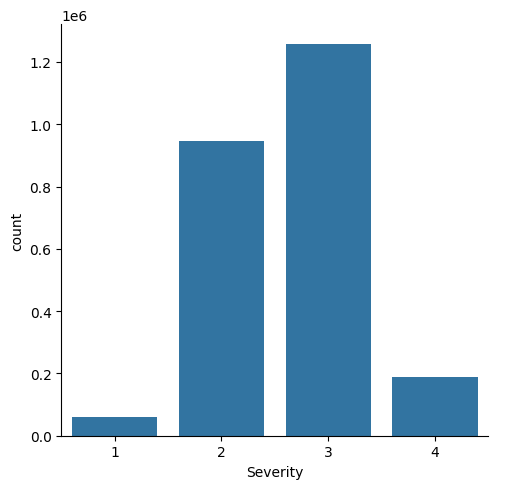

In [ ]:
sns.catplot(x='Severity',kind='count',data=data)

This pie chart shows the percentage distribution of Severity levels in the original dataset.

([<matplotlib.patches.Wedge at 0x7cbc2244fbc0>,
 [Text(-0.042753725590873315, 1.0991688309573286, '3'),
  Text(-0.30540966794228064, -1.0567520687121392, '2'),
  Text(1.0135975989690558, -0.42734050517610145, '4'),
  Text(1.0965888018053114, -0.08656211501108113, '1')],
 [Text(-0.02332021395865817, 0.5995466350676337, '51.24%'),
  Text(-0.16658709160488033, -0.5764102192975304, '38.57%'),
  Text(0.5528714176194849, -0.23309482100514622, '7.69%'),
  Text(0.5981393464392607, -0.04721569909695334, '2.51%')])

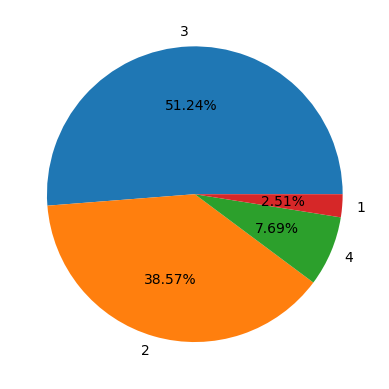

In [ ]:
plt.pie(data['Severity'].value_counts(),labels=data['Severity'].value_counts().index,autopct='%1.2f%%')

This heatmap displays the correlation matrix of the numerical columns in the balanced dataset, showing the relationships between different numerical features.

<Axes: >

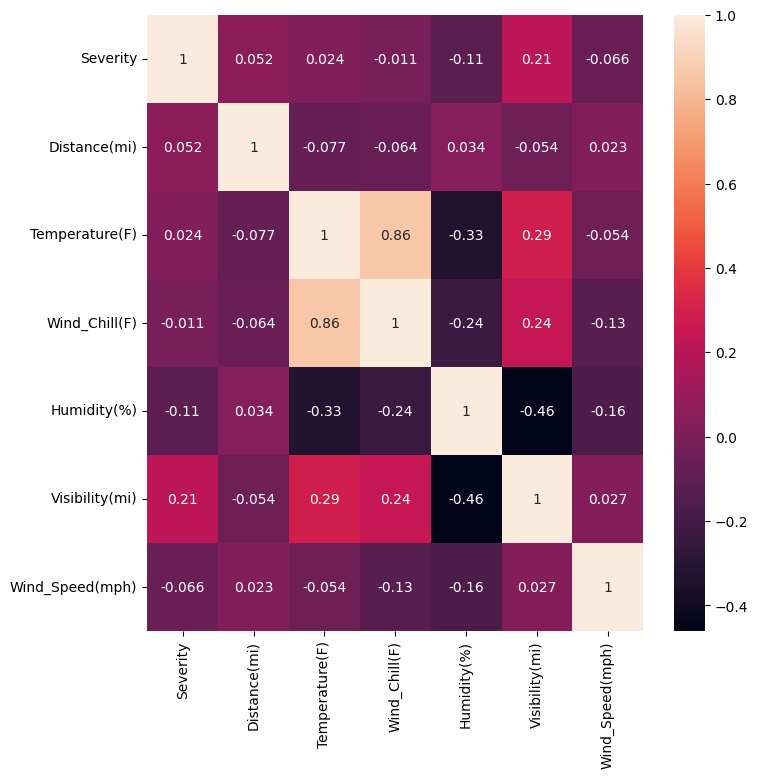

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(balanced_data[numerical_col].corr(),annot=True)

**These box plots visualize the distribution of 'Distance(mi)' and 'Temperature(F)' for each Severity level in the balanced dataset, helping to identify potential differences in these features across severity.**

**Outliers are handle in preprocessing**

<Axes: xlabel='Severity', ylabel='Temperature(F)'>

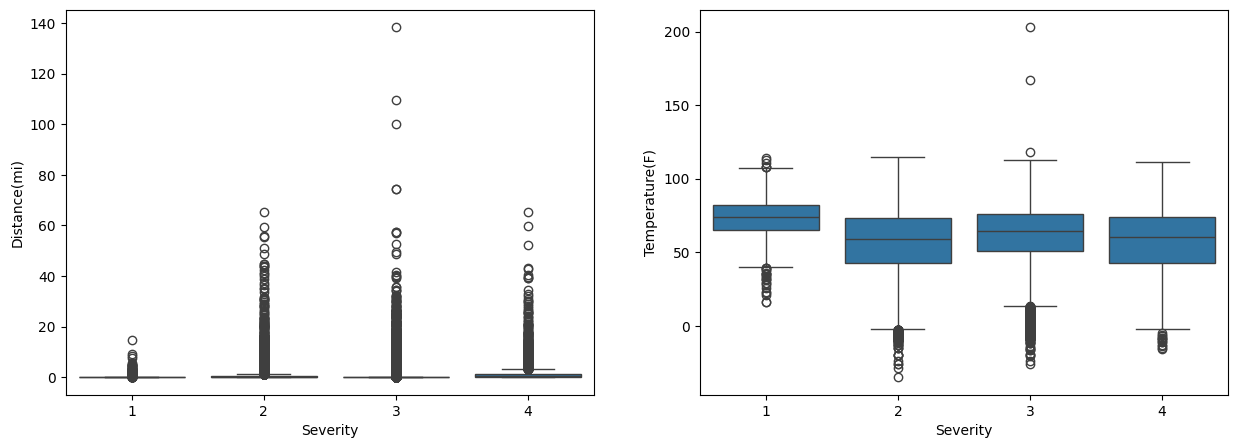

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Severity',y='Distance(mi)',data=balanced_data,ax=axes[0])
sns.boxplot(x='Severity',y='Temperature(F)',data=balanced_data,ax=axes[1])

These box plots show the distribution of 'Wind_Chill(F)' and 'Humidity(%)' for each Severity level in the balanced dataset.

<Axes: xlabel='Severity', ylabel='Humidity(%)'>

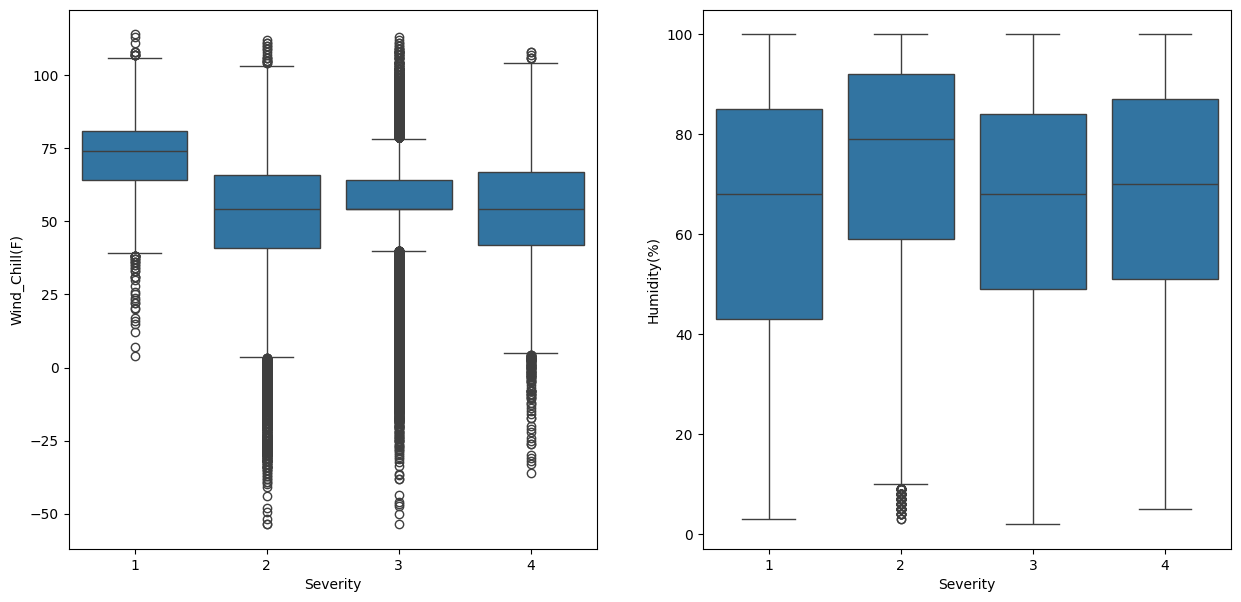

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x='Severity',y='Wind_Chill(F)',data=balanced_data,ax=axes[0])
sns.boxplot(x='Severity',y='Humidity(%)',data=balanced_data,ax=axes[1])

These box plots illustrate the distribution of 'Visibility(mi)' and 'Wind_Speed(mph)' for each Severity level in the balanced dataset.

<Axes: xlabel='Severity', ylabel='Wind_Speed(mph)'>

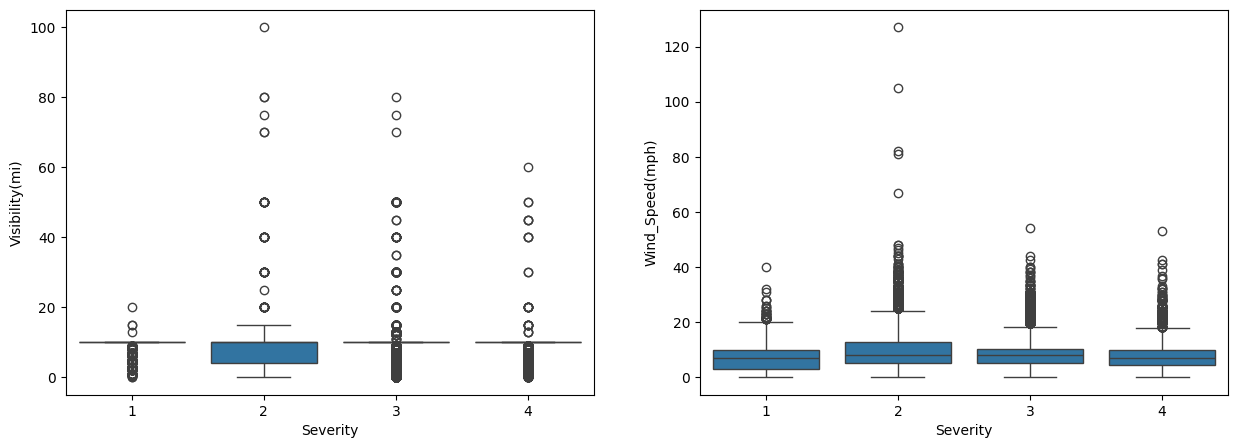

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Severity',y='Visibility(mi)',data=balanced_data,ax=axes[0])
sns.boxplot(x='Severity',y='Wind_Speed(mph)',data=balanced_data,ax=axes[1])

/tmp/ipython-input-1605327803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data[col])


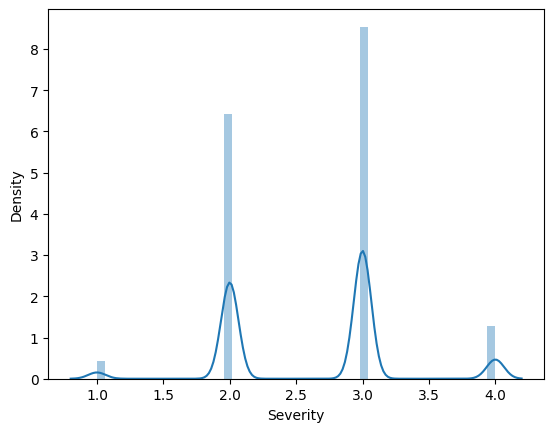

/tmp/ipython-input-1605327803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data[col])


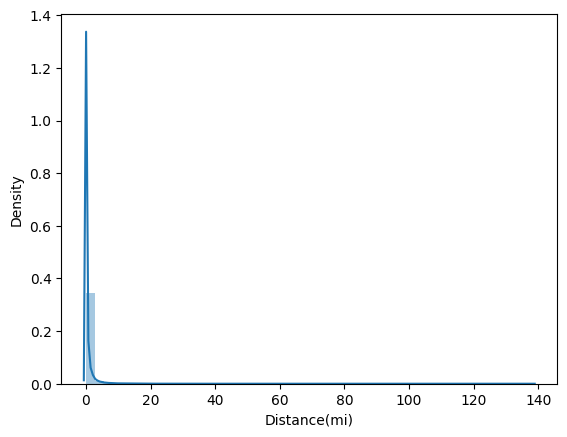

/tmp/ipython-input-1605327803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data[col])


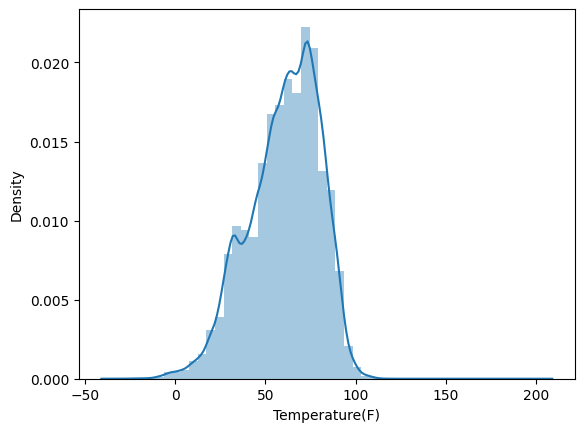

/tmp/ipython-input-1605327803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data[col])


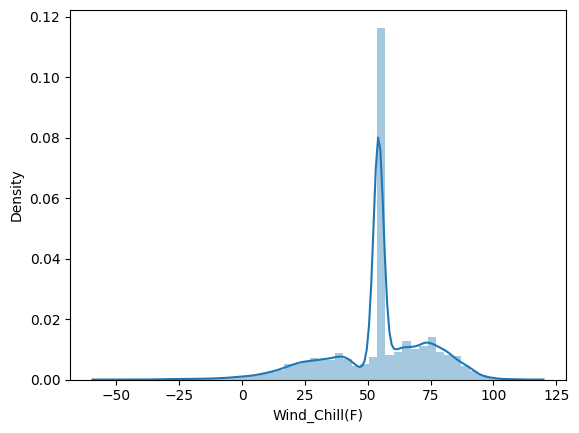

/tmp/ipython-input-1605327803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data[col])


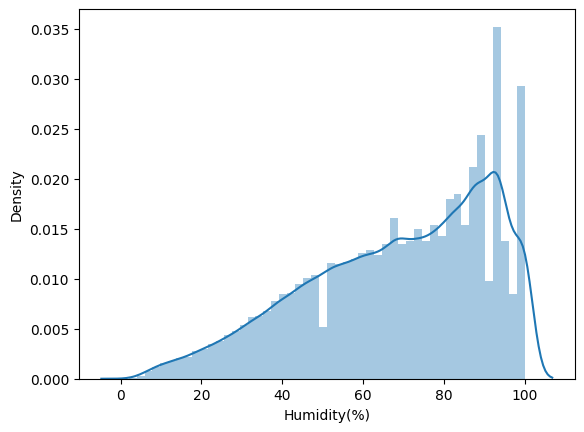

/tmp/ipython-input-1605327803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data[col])


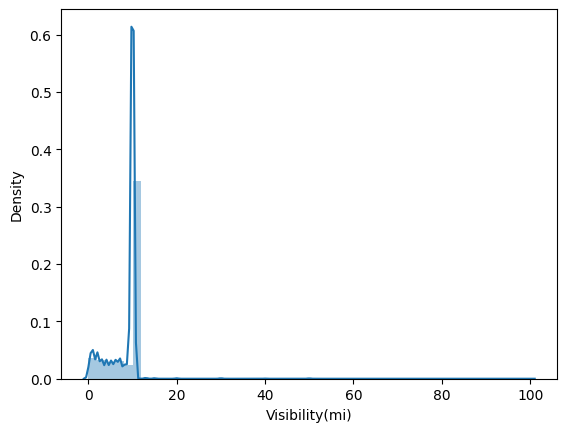

/tmp/ipython-input-1605327803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data[col])


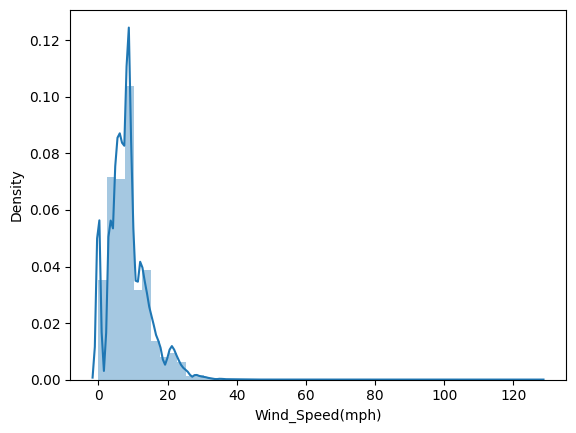

In [ ]:
for col in numerical_col:
  sns.distplot(balanced_data[col])
  plt.show()

This scatter plot shows the relationship between 'Distance(mi)' and 'Temperature(F)', with points colored by 'Severity' in the balanced dataset.

<Axes: xlabel='Distance(mi)', ylabel='Temperature(F)'>

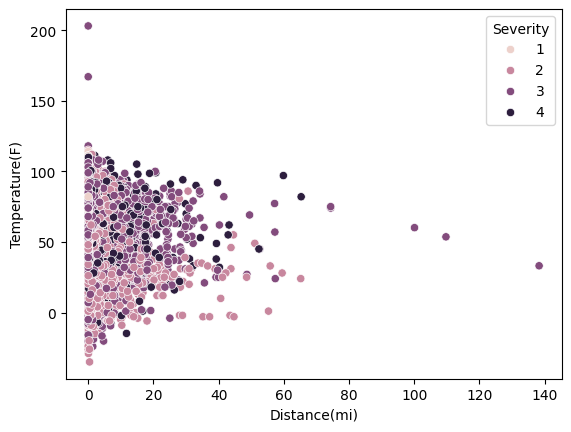

In [ ]:

sns.scatterplot(x='Distance(mi)',y='Temperature(F)',hue='Severity',data=balanced_data)

This scatter plot shows the relationship between 'Temperature(F)' and 'Distance(mi)', with points colored by 'Severity' and styled by 'Junction' in the balanced dataset.

<Axes: xlabel='Temperature(F)', ylabel='Distance(mi)'>

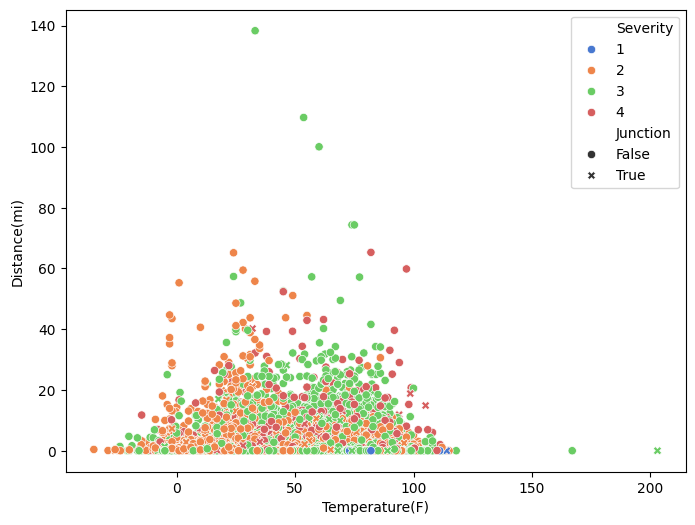

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temperature(F)',y='Distance(mi)',hue='Severity',style='Junction', data=balanced_data,palette='muted')

This bar plot displays the average 'Distance(mi)' for each Severity level in the balanced dataset.

<Axes: ylabel='Distance(mi)'>

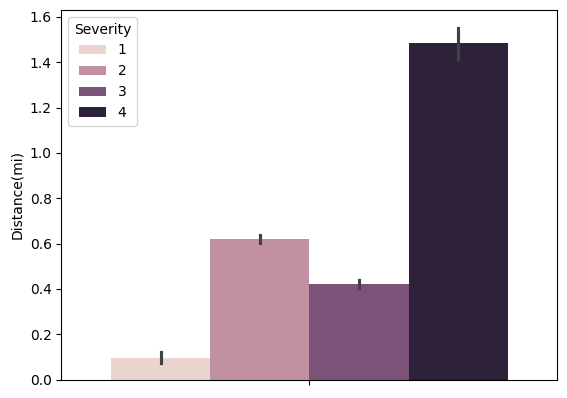

In [ ]:
sns.barplot(y='Distance(mi)',hue='Severity',data=balanced_data)

This KDE plot shows the joint distribution of 'Wind_Speed(mph)' and 'Visibility(mi)', colored by 'Severity' in the balanced dataset.

<Axes: xlabel='Wind_Speed(mph)', ylabel='Visibility(mi)'>

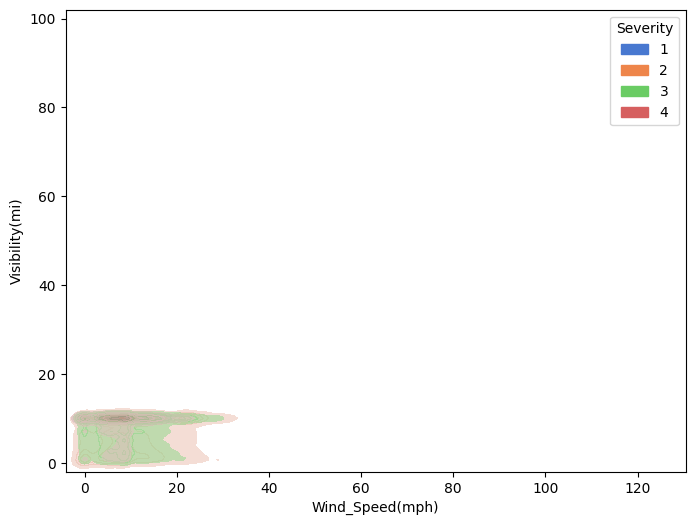

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(x='Wind_Speed(mph)',y='Visibility(mi)',hue='Severity',data=balanced_data,fill=True,alpha=0.5,palette='muted')

# **Numerical and Categorical**

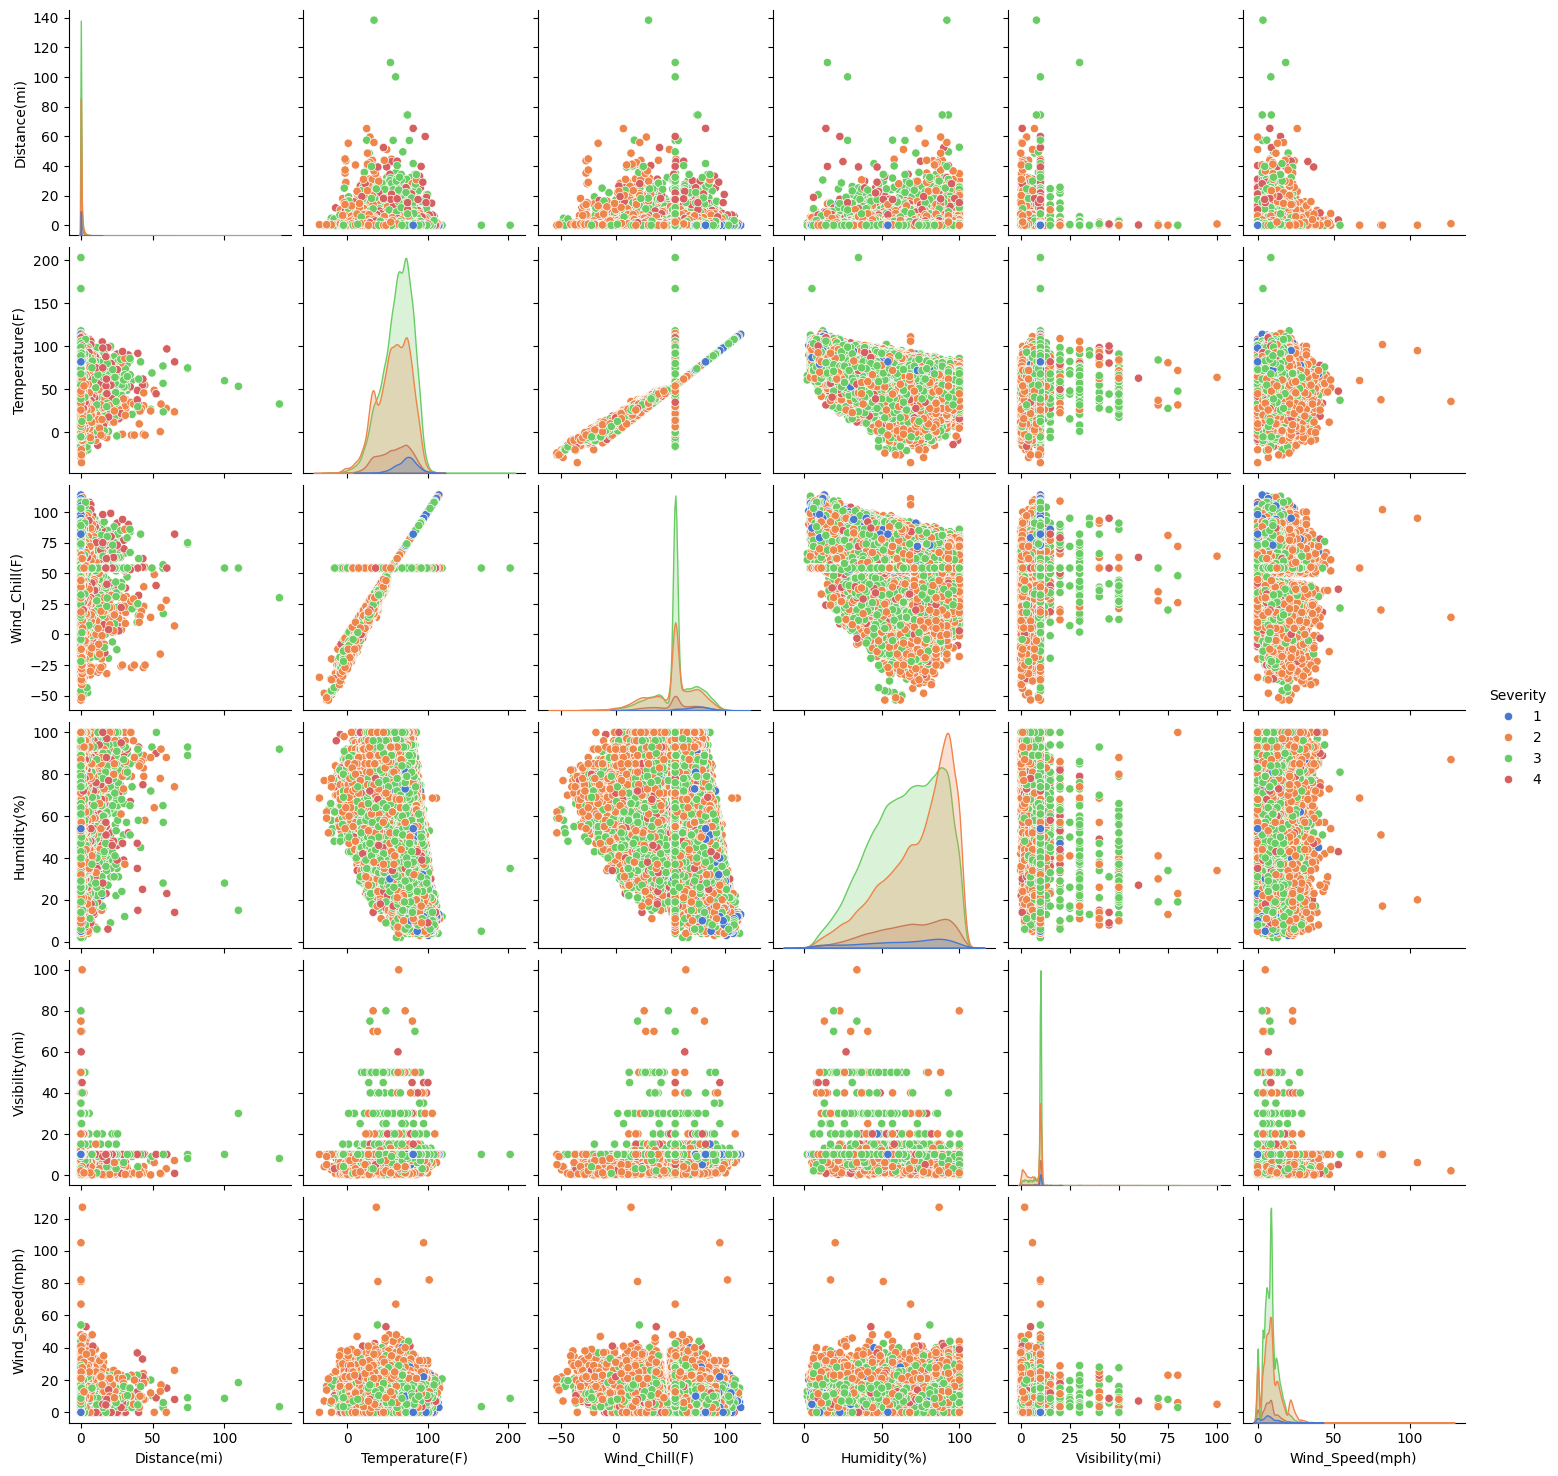

In [ ]:
# This may take a while to run due to the number of data points and columns.
sns.pairplot(balanced_data[numerical_col],hue='Severity',palette='muted')

This plot shows the distribution of 'Temperature(F)' and 'Humidity(%)' using Kernel Density Estimate (KDE) plots on the balanced dataset.

/tmp/ipython-input-3669551331.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data['Temperature(F)'],kde=True)
/tmp/ipython-input-3669551331.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data['Humidity(%)'],kde=True)


<Axes: xlabel='Humidity(%)', ylabel='Density'>

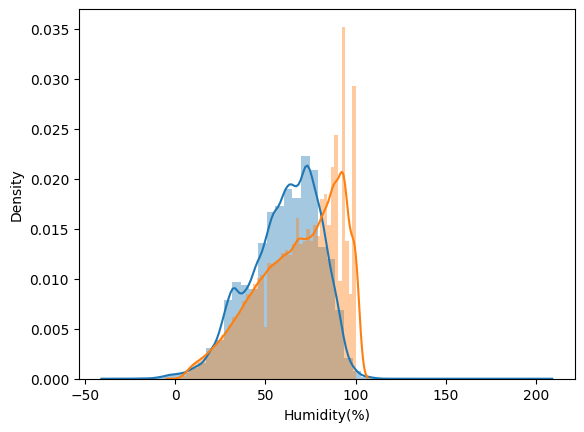

In [ ]:
# sns.distplot(balanced_data['Distance(mi)'],kde=True)
sns.distplot(balanced_data['Temperature(F)'],kde=True)
sns.distplot(balanced_data['Humidity(%)'],kde=True)

This histogram displays the distribution of 'Temperature(F)' for each Severity level in the balanced dataset.

/tmp/ipython-input-3457726861.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Severity')


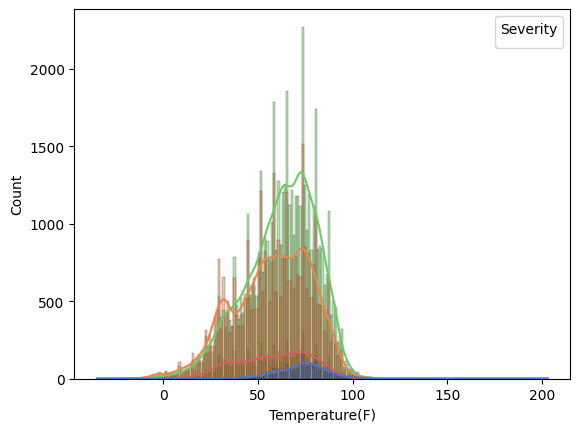

In [ ]:
sns.histplot(data=balanced_data, x='Temperature(F)', hue='Severity', kde=True,palette='muted')
plt.legend(title='Severity')

These KDE plots show the distribution of 'Visibility(mi)' for each Severity level in the balanced dataset.

<Axes: xlabel='Visibility(mi)', ylabel='Density'>

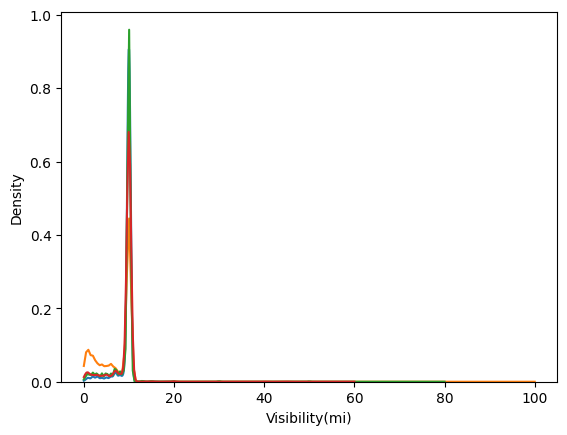

In [ ]:
sns.kdeplot(data=balanced_data[balanced_data['Severity'] == 1], x='Visibility(mi)', cut=0)
sns.kdeplot(data=balanced_data[balanced_data['Severity'] == 2], x='Visibility(mi)', cut=0)
sns.kdeplot(data=balanced_data[balanced_data['Severity'] == 3], x='Visibility(mi)', cut=0)
sns.kdeplot(data=balanced_data[balanced_data['Severity'] == 4], x='Visibility(mi)', cut=0)

These KDE plots show the distribution of 'Wind_Speed(mph)' for each Severity level in the balanced dataset.

<Axes: xlabel='Wind_Speed(mph)', ylabel='Density'>

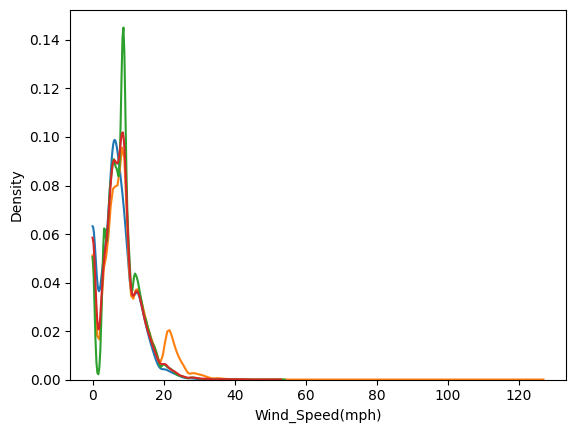

In [ ]:
sns.kdeplot(data=balanced_data[balanced_data['Severity'] == 1], x='Wind_Speed(mph)', cut=0)
sns.kdeplot(data=balanced_data[balanced_data['Severity'] == 2], x='Wind_Speed(mph)', cut=0)
sns.kdeplot(data=balanced_data[balanced_data['Severity'] == 3], x='Wind_Speed(mph)', cut=0)
sns.kdeplot(data=balanced_data[balanced_data['Severity'] == 4], x='Wind_Speed(mph)', cut=0)

<Axes: xlabel='Visibility(mi)', ylabel='Astronomical_Twilight'>

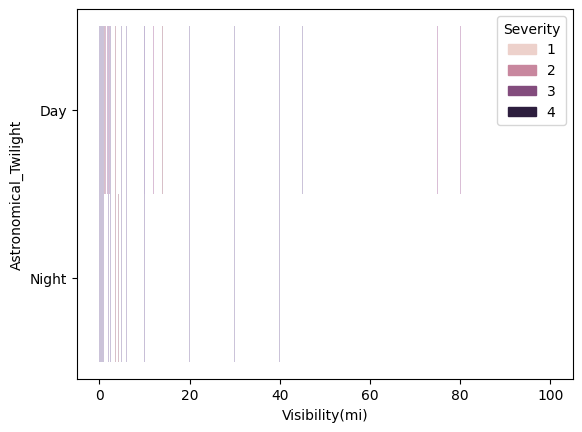

In [ ]:
sns.histplot(x='Visibility(mi)',y='Astronomical_Twilight',hue='Severity',data=balanced_data)

This scatter plot shows the relationship between 'Humidity(%)' and 'Visibility(mi)', colored by 'Severity' in the balanced dataset.

<Axes: xlabel='Humidity(%)', ylabel='Visibility(mi)'>

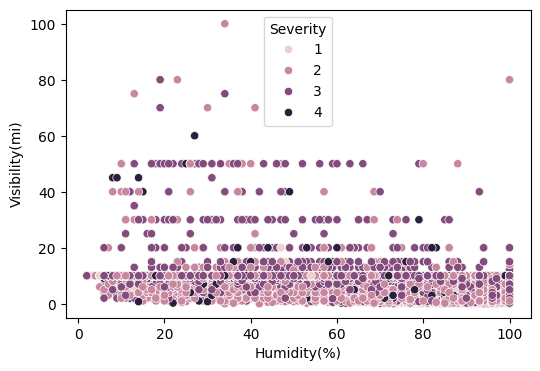

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Humidity(%)',y='Visibility(mi)',hue='Severity',data=balanced_data[numerical_col])


# Categorical to Categorical

This bar plot shows the relationship between Severity and Sunrise/Sunset in the balanced dataset.

<Axes: xlabel='Severity', ylabel='Sunrise_Sunset'>

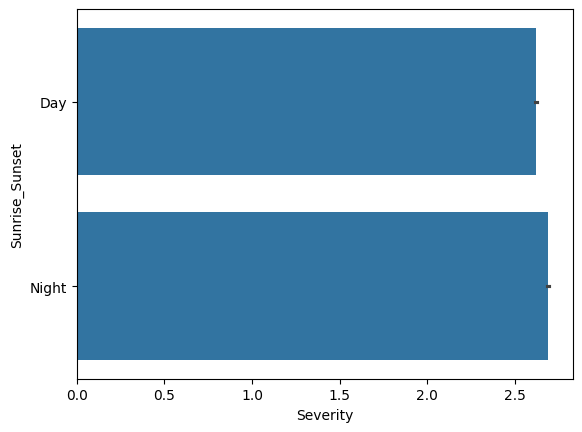

In [ ]:
sns.barplot(x='Severity',y='Sunrise_Sunset',data=balanced_data)

This bar plot shows the relationship between Traffic_Calming and Severity in the balanced dataset.

<Axes: xlabel='Traffic_Calming', ylabel='Severity'>

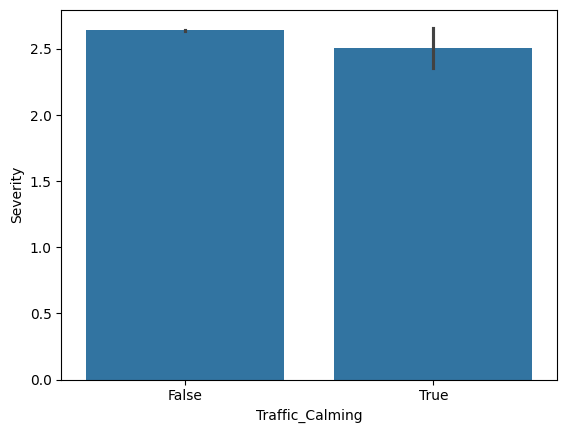

In [ ]:
sns.barplot(x='Traffic_Calming',y='Severity',data=balanced_data)

This heatmap shows the relationship between Wind_Direction and Severity in the balanced dataset.

<Axes: xlabel='Severity', ylabel='Wind_Direction'>

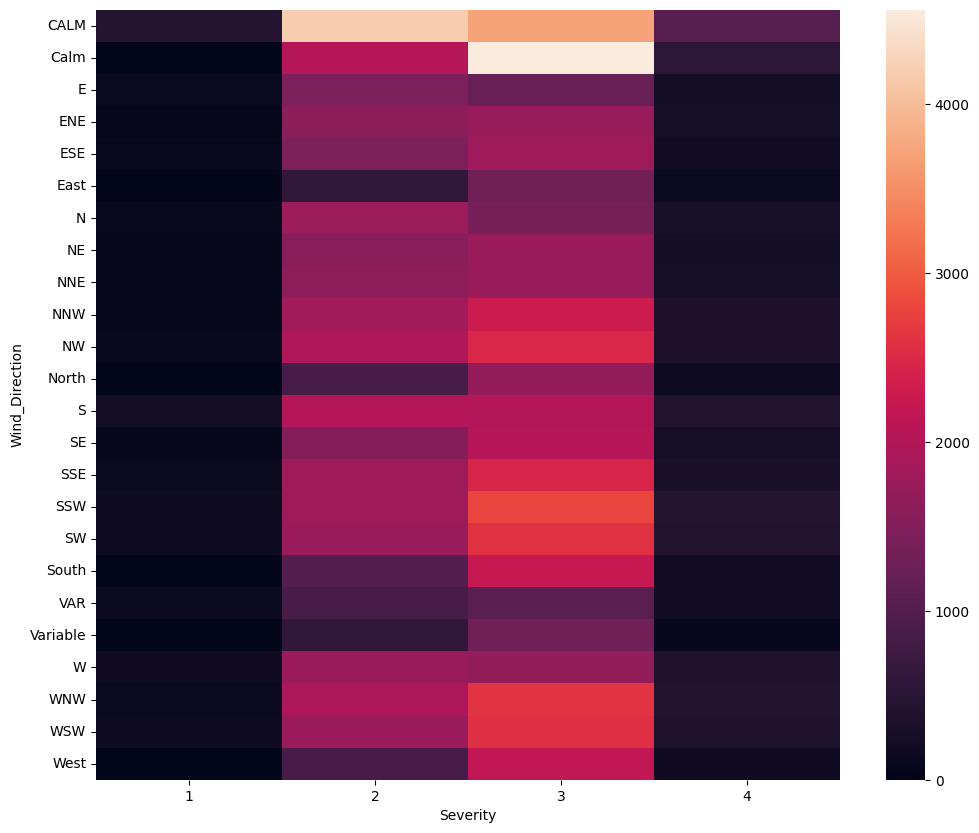

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.crosstab(balanced_data['Wind_Direction'],balanced_data['Severity']))
